In this study we observed 249 mice who were identified wih having tumors. After treating the mice with a range of drug regimens we observed the efficacacy of particularly four drugs . Tumor development was observed and analysed. One specific drug named "Capoulin" was further studied to note its efficacy over the other drug regimens. 

Results: 
Firstly, we found that Capomulin, our particular drug of interest, and Ramicane had higher number of application per mice compared to Infubinol and Ceftamin. Propriva was tested the least in each mice. Boxplot analysis showed that Capomulin and Ramicane regimens were the most effective when it came to the decrease in size of mice tumor volume. Consequently we found that Ceftamin and Infubinol had the higher tumor volumes compared to the other other two. Interestingly enough, there was only one outlier belonging to the Infubinol treatment, who had an extremely low tumor volume of 36.21. 

Our second observation shows that there is a positive correlation (0.84) between the mouse weight and the average tumor volume for the Capomulin regimen. This correlation tells us that, as the size of tumors decline in mouse, weight loss is also accompanied. The opposite is true, as the size of tumors increase, so does weight gain. 

The pie chart shows us that gender does not really play a role in the study, as the mice are evenly distributed between sexes. 

Finally, the scatter plot tells us and the regressed line between mouse weight and the average tumor volume tells us there is a strong correlation between mouse weight to tumor volume. The correlation between two variables is 0.84, it indicates a strong positive linear relationship. This means that as one variable increases, the other variable tends to increase as well. The closer the correlation value is to 1, the stronger the relationship. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

pharma_data_complete=pd.merge(study_results, mouse_metadata, on="Mouse ID", how="inner")

# Display the data table for preview
pharma_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
unique_mice=pharma_data_complete["Mouse ID"].nunique()
unique_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates= pharma_data_complete[pharma_data_complete.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice = duplicates["Mouse ID"].unique()
output_string = f"array({duplicate_mice}, dtype={duplicate_mice.dtype})"
print(output_string)

array(['g989'], dtype=object)


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = "g989"
duplicate_data = pharma_data_complete[pharma_data_complete["Mouse ID"] == duplicate_mouse_id]

# Display all data for the duplicate Mouse ID
print("Mouse ID g989 Complete Data", duplicate_mouse_id)
duplicate_data

Mouse ID g989 Complete Data g989


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
duplicate_data=duplicate_data["Mouse ID"]
duplicate_data

107     g989
137     g989
329     g989
360     g989
620     g989
681     g989
815     g989
869     g989
950     g989
1111    g989
1195    g989
1380    g989
1592    g989
Name: Mouse ID, dtype: object

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df=pharma_data_complete[pharma_data_complete["Mouse ID"].isin(duplicate_data)== False]
#clean_data_df=pharma_data_complete.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)
clean_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
all_mice=clean_data_df["Mouse ID"].nunique()
all_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_mean = clean_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
regimen_median = clean_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
regimen_variance = clean_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
regimen_std = clean_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
regimen_SEM = clean_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()



# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats= pd.DataFrame({"Mean Tumor Volume": regimen_mean, 
                                    "Median Tumor Volume":regimen_median, 
                                    "Tumor Volume Variance":regimen_variance, 
                                    "Tumor Volume Std. Dev.": regimen_std, 
                                    "Tumor Volume Std. Err.": regimen_SEM})

# Assemble the resulting series into a single summary DataFrame.
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
agg_stats =  clean_data_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_stats

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

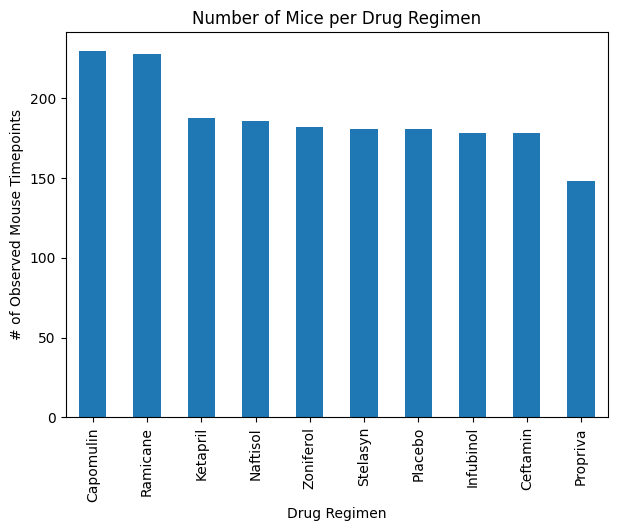

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_count=clean_data_df['Drug Regimen'].value_counts()
mouse_count.plot(kind='bar', figsize=(7, 5))

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Mice per Drug Regimen")

plt.show()

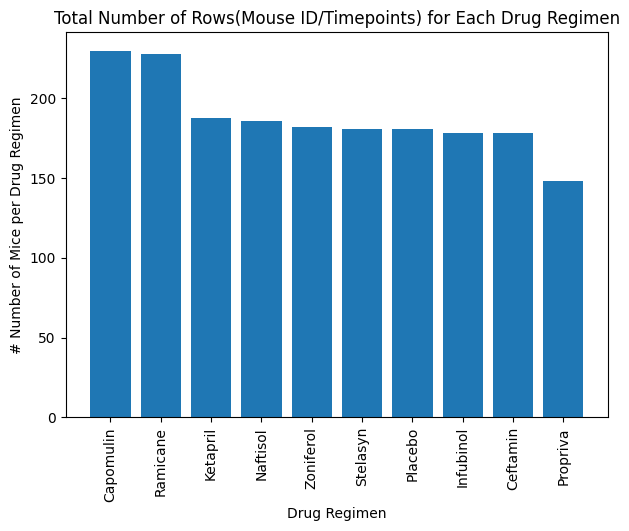

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


plt.figure(figsize=(7, 5))
plt.bar(mouse_count.index, mouse_count.values)
plt.title('Total Number of Rows(Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# Number of Mice per Drug Regimen')
plt.xticks(rotation=90)
plt.show()

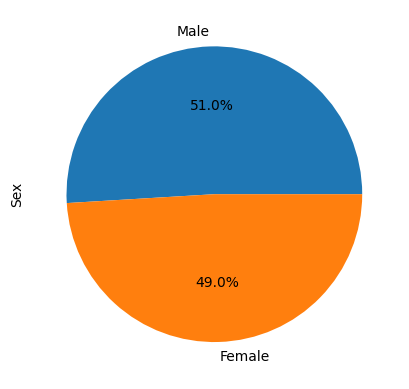

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pie=clean_data_df['Sex'].value_counts()
gender_pie.plot.pie(autopct= "%1.1f%%")

plt.ylabel('Sex')
plt.show()


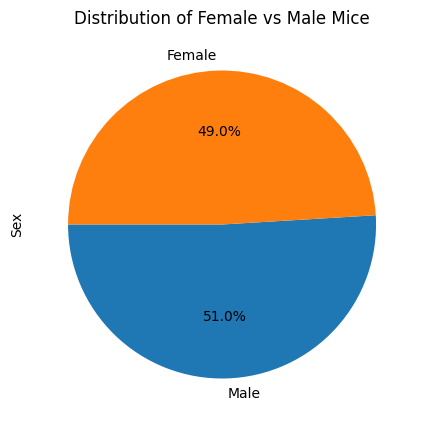

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(7, 5))
plt.pie(gender_pie, labels=gender_pie.index, autopct='%1.1f%%', startangle=180)
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse

individual_treatments = clean_data_df.groupby(['Mouse ID'])['Timepoint'].max()
individual_treatments.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
individual_treatments = pd.merge(clean_data_df, individual_treatments, how = 'right', on = ['Mouse ID', 'Timepoint'])
individual_treatments



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [52]:
# Put treatments into a list for for loop (and later for plot labels)

treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']



# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in treatments:
    tumor_volume = individual_treatments.loc[individual_treatments['Drug Regimen'] == treatment, ['Tumor Volume (mm3)']]
        
    # add subset 
    tumor_vol_data.append(tumor_volume)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volume["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile-lower_quartile


 # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5*iqr)
    upper_bound = upper_quartile + (1.5*iqr)
    outliers= tumor_volume.loc[(tumor_volume['Tumor Volume (mm3)']< lower_bound) |(tumor_volume["Tumor Volume (mm3)"]> upper_bound) ]
    print(f"{treatment} potential outliers are {outliers}")
    print(f"The lower quartile of {treatment} treatments is: {lower_quartile}")
    print(f"The upper quartile of {treatment} treatments is: {upper_quartile}")
    print(f"The interquartile range of {treatment} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {treatment} outliers.")
    print(f"Values above {upper_bound} could be {treatment} outliers.")

    if not outliers.empty:
        print(f"  Potential outliers: {outliers.values}")
    else:
        print("  No potential outliers.")
       

Capomulin potential outliers are Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
The lower quartile of Capomulin treatments is: 32.37735684
The upper quartile of Capomulin treatments is: 40.1592203
The interquartile range of Capomulin treatments is: 7.781863460000004
Values below 20.70456164999999 could be Capomulin outliers.
Values above 51.83201549 could be Capomulin outliers.
  No potential outliers.
Ramicane potential outliers are Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
The lower quartile of Ramicane treatments is: 31.56046955
The upper quartile of Ramicane treatments is: 40.65900627
The interquartile range of Ramicane treatments is: 9.098536719999998
Values below 17.912664470000003 could be Ramicane outliers.
Values above 54.30681135 could be Ramicane outliers.
  No potential outliers.
Infubinol potential outliers are     Tumor Volume (mm3)
31           36.321346
The lower quartile of Infubinol treatments is: 54.04860769
The upper quartile of Infubinol trea

/var/folders/yx/mscwdl4d42xd49b1zt9vkbph0000gn/T/ipykernel_47044/3520105600.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(tumor_volumes, labels=treatments, flierprops=dict(marker='o', markersize=10, markerfacecolor='red'))


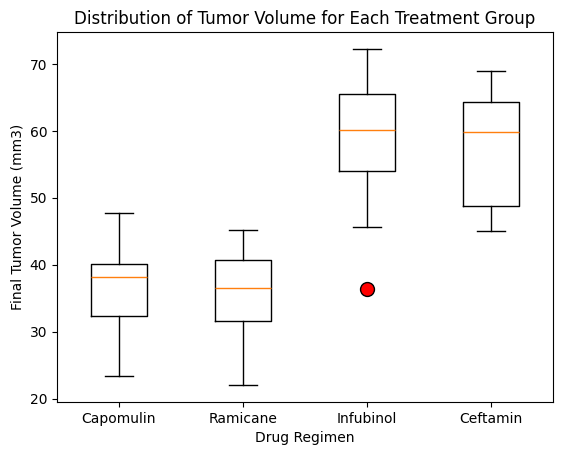

In [50]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Define the treatments and corresponding tumor volumes
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes = [individual_treatments.loc[individual_treatments['Drug Regimen'] == treatment, 'Tumor Volume (mm3)'].values for treatment in treatments]

# Create the box plot
fig, ax = plt.subplots()
ax.boxplot(tumor_volumes, labels=treatments, flierprops=dict(marker='o', markersize=10, markerfacecolor='red'))
ax.set_title('Distribution of Tumor Volume for Each Treatment Group')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')

plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

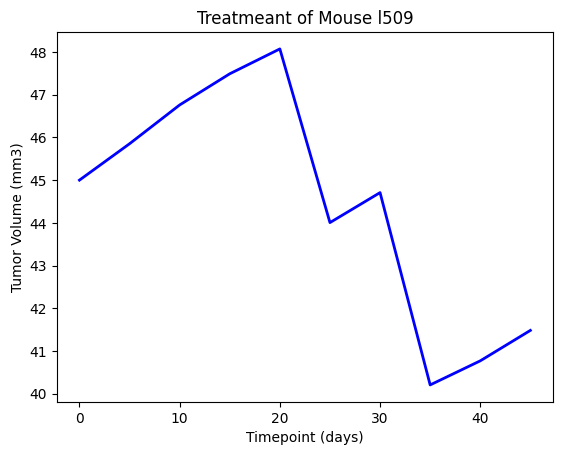

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_treatment=clean_data_df.loc[clean_data_df["Drug Regimen"] == "Capomulin",:]

line_plot= capomulin_treatment.loc[capomulin_treatment["Mouse ID"] == "l509",:]
line_plot.head()
x_axis = line_plot["Timepoint"]
y_axis = line_plot["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Treatmeant of Mouse l509')
plt.plot(x_axis, y_axis,linewidth=2,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

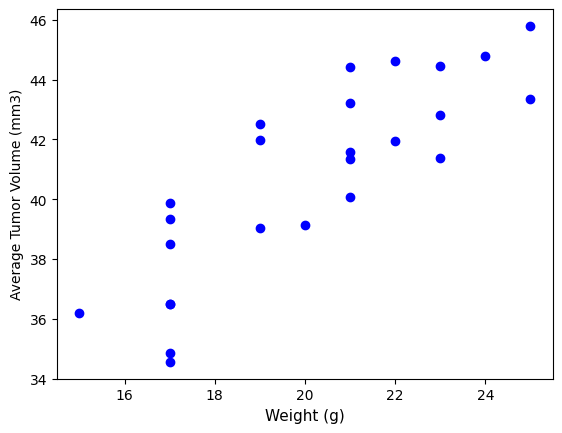

In [36]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()

capomulin_average = capomulin_treatment.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

marker_size=10
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'], color="blue")
plt.xlabel('Weight (g)',fontsize =11)
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


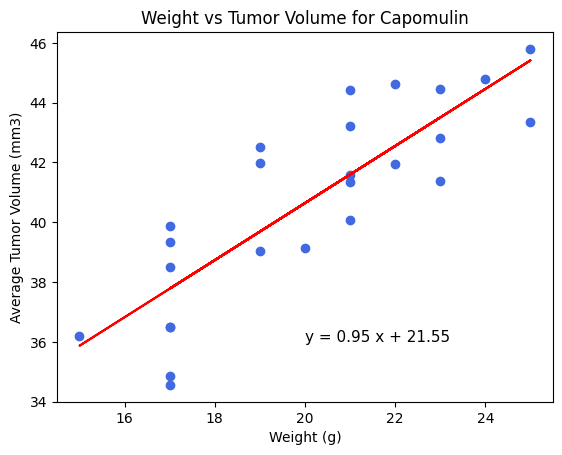

In [40]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient = st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_coefficient[0],2)}")


(slope, intercept,rvalue, pvalue, stderr)=st.linregress(capomulin_average["Weight (g)"],capomulin_average["Tumor Volume (mm3)"])
regress_values=capomulin_average["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(capomulin_average["Weight (g)"],capomulin_average["Tumor Volume (mm3)"],color='royalblue')
plt.plot(capomulin_average["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=11)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

